## Index No - 190621M
## Name - K. Thanushan 

## EN2550 Assignment 02
## Fitting and alignment

### Question 1:- RANSAC Implementation

In [3]:
import numpy as np
from scipy.optimize import minimize
from scipy import linalg

np.random.seed(0)
N = 100
half_n = N//2
r = 10
s = r/16
t = np.random.uniform(0, 2*np.pi, half_n)
n = s*np.random.randn(half_n)
x, y = (r + n) * np.cos(t), (r + n)*np.sin(t)
X_circ = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))
m, b = -1, 2
x = np.linspace(-12, 12, half_n)
y = m*x + b + s*np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))
X = np.vstack((X_circ, X_line))



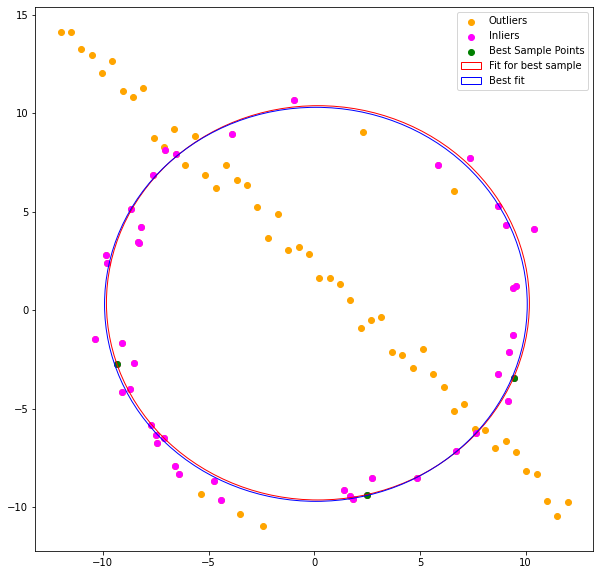

In [67]:
import matplotlib.pyplot as plt
def RANSAC_fit(X):
    t = 1
    N = np.inf
    Bestfit = None
    Inliers = []
    sample_points =[] 
    p = 0.99 #probability 𝑝, at least one random sample is free from outliers 
    iterations = 0
    min_s = 3 #Minimum no of points required to find the equation of the circle
    while N > iterations:
        random_indices= np.random.randint(X.shape[0], size=min_s)
        point1, point2, point3 = X[random_indices]
        
        #Calculation of the center coordinates and the radius of the circle passing through the sample points
        coefficientMatrix = np.array([[point2[0] - point1[0], point2[1] - point1[1]], [point3[0] - point1[0], point3[1] - point1[1]]]) 
        constantMatrix = np.array([[point2[0]**2 - point1[0]**2 + point2[1]**2 - point1[1]**2], [point3[0]**2 - point1[0]**2 + point3[1]**2 - point1[1]**2]])		
        invCoefficientMatrix = np.linalg.pinv(coefficientMatrix)

        center_x, center_y = (invCoefficientMatrix@constantMatrix) / 2
        center_x, center_y = center_x[0], center_y[0]
        r = np.sqrt((point1[0]- center_x)**2 + (point1[1] - center_y)**2)

        Inlier_test = []
        #Checking for inliers and appending them into the inlier set.
        for x, y in X:
            distance = np.sqrt((x - center_x)**2 + (y - center_y)**2)
            if (np.abs(distance - r) < t):
                Inlier_test.append([x,y])
                

        #Checking whether the number of current inliers is greater than the past inliers
        if (len(Inlier_test) > len(Inliers)):
            Bestfit = [center_x, center_y, r] #Getting the center coordinates and radius of the best fit circle
            Inliers = Inlier_test
            sample_points = [point1, point2, point3]  #Collecting the sample points of the best fit
            e = 1 - ((len(Inliers)/len(X))) #Outlier ratio 0.5 was taken for the worst case
            N = np.log(1-p)/np.log(1-(1-e)**min_s)  #calculation of samples
        iterations+=1
    return Bestfit, Inliers, sample_points

Bestfit, Inliers, sample_points = RANSAC_fit(X_circ)
center_x, center_y, r = Bestfit[0], Bestfit[1], Bestfit[2]
Inliers = np.array(Inliers)

Bestfit2, Inliers2, sample_points2 = RANSAC_fit(Inliers)
center_x2, center_y2, r2 = Bestfit2[0], Bestfit2[1], Bestfit2[2]


fig, ax = plt.subplots(1, 1, figsize = (10,10))
ax.scatter(X[:, 0], X[:, 1], c='orange', marker='o', label='Outliers')
ax.scatter(Inliers[:, 0], Inliers[:, 1], c='magenta', marker='o', label='Inliers')
ax.scatter([sample_points[0][0], sample_points[1][0], sample_points[2][0]], [sample_points[0][1], sample_points[1][1], sample_points[2][1]], c='green', marker='o', label='Best Sample Points')
circle = plt.Circle((center_x, center_y), radius=r, color='r', fc='y', fill=False, label = 'Fit for best sample')
plt.gca().add_patch(circle)
circle2 = plt.Circle((center_x2, center_y2), radius=r2, color='b', fc='y', fill=False, label = 'Best fit')
plt.gca().add_patch(circle2)
plt.legend()
plt.show()

### Question 2:- Image Warping and Blending by calculating a hormography

C:\Users\K.Thanushan\AppData\Local\Temp\ipykernel_4940\1932666052.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  point_matrix_archiImage = np.empty((points,2), np.int)


(-0.5, 1023.5, 767.5, -0.5)

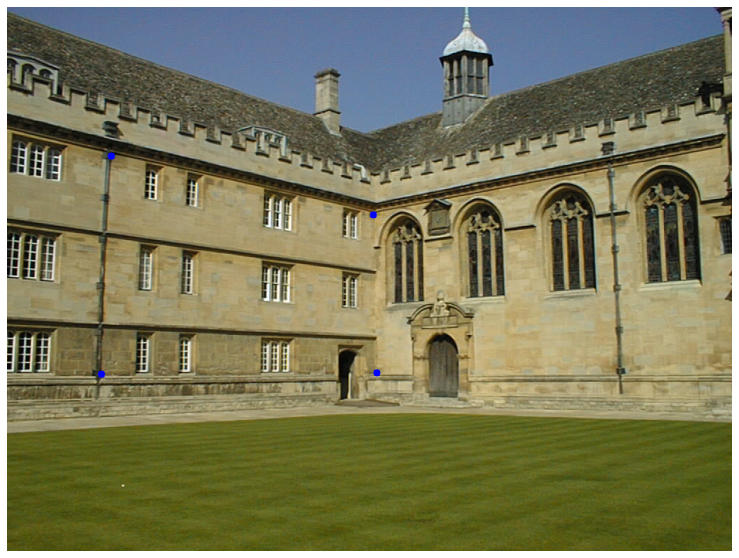

In [50]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

points = 4
counter = 0    
point_matrix_archiImage = np.empty((points,2), np.int)
point_matrix_Flag = np.empty((points,2))

# mouse callback function
def mousePoints(event,x,y,flags,array):
    global counter
    point_matrix = array[0]
    if event == cv.EVENT_LBUTTONDOWN: # Left button mouse click event opencv
        cv.circle(array[1],(x,y),5,(255,0,0),-1)        
        point_matrix[counter] = [x,y]
        counter += 1
          
archiImage = cv.imread(r'./Images/001.jpg', cv.IMREAD_ANYCOLOR)
Flag = cv.imread(r'./Images/Flag_of_the_United_Kingdom.png', cv.IMREAD_ANYCOLOR)

archiImage_copy = archiImage.copy()
Flag_copy = Flag.copy()
assert archiImage is not None
assert Flag is not None

cv.namedWindow('Archi Image', cv.WINDOW_AUTOSIZE)
array1 = [point_matrix_archiImage, archiImage_copy]
cv.setMouseCallback('Archi Image',mousePoints, array1)

while True:
    cv.imshow("Archi Image", archiImage_copy)
    if counter == points:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break

point_matrix_Flag = np.array([[0,0],  [382, 0], [382, 191], [0, 191]])
point_matrix_archiImage = np.array(point_matrix_archiImage)
Imageplot1 = cv.cvtColor(archiImage_copy, cv.COLOR_BGR2RGB)
Imageplot2 = cv.cvtColor(Flag_copy, cv.COLOR_BGR2RGB)
fig, ax = plt.subplots(1,1,figsize = (20,10))
ax.imshow(Imageplot1)
ax.axis('off')

Homography Matrix =  [[ 1.48380528e+00 -1.10716903e-01  1.47000000e+02]
 [ 5.09268078e-01  1.46683035e+00  2.10000000e+02]
 [ 9.96554918e-04 -2.81341885e-04  1.00000000e+00]]


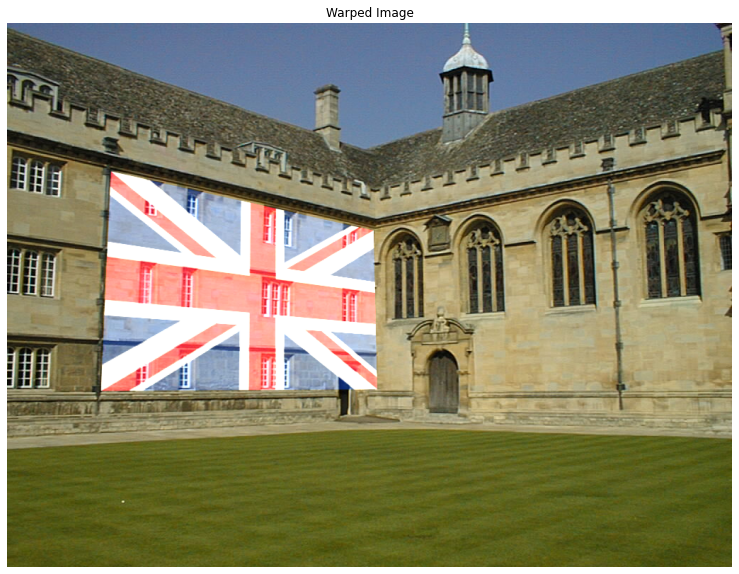

In [53]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

def computeHomography(matrix1, matrix2):
    n = matrix1.shape[0]
    A = np.zeros((2*n, 9))
    for i in range(n):
        xs = point_matrix_Flag[i][0]
        ys = point_matrix_Flag[i][1]
        xd = point_matrix_archiImage[i][0]
        yd = point_matrix_archiImage[i][1]
        A[2*i] =  np.array([xs, ys, 1, 0, 0, 0, -xd*xs, -xd*ys, -xd])
        A[2*i+1] = np.array([0, 0, 0, xs, ys, 1, -yd*xs, -yd*ys, -yd])
    A = np.array(A)

    w, v = np.linalg.eig((A.T)@A)
    V = v[:, np.argmin(w)]
    V = np.reshape(V,(3,3))
    V = V/V[2][2]
    return V

V = computeHomography(point_matrix_Flag, point_matrix_archiImage)
Flag_warped_Image = cv.warpPerspective(Flag, V, (archiImage.shape[1], archiImage.shape[0]))
Final_Image = cv.addWeighted(archiImage, 1, Flag_warped_Image, 1, 0)
print('Homography Matrix = ', V)
Imageplot = cv.cvtColor(Final_Image, cv.COLOR_BGR2RGB)
fig, ax = plt.subplots(1,1, figsize = (20,10))
ax.imshow(Imageplot)
ax.set_title('Warped Image')
ax.axis('off')
plt.show()

C:\Users\K.Thanushan\AppData\Local\Temp\ipykernel_4940\924732239.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  point_matrix_archiImage = np.empty((points,2), np.int)


[[ 1.59008340e+00 -3.29505338e-02  1.74000001e+02]
 [ 4.88088832e-01  1.76813114e+00  1.91000000e+02]
 [ 1.03482790e-03 -1.27683234e-04  1.00000000e+00]]


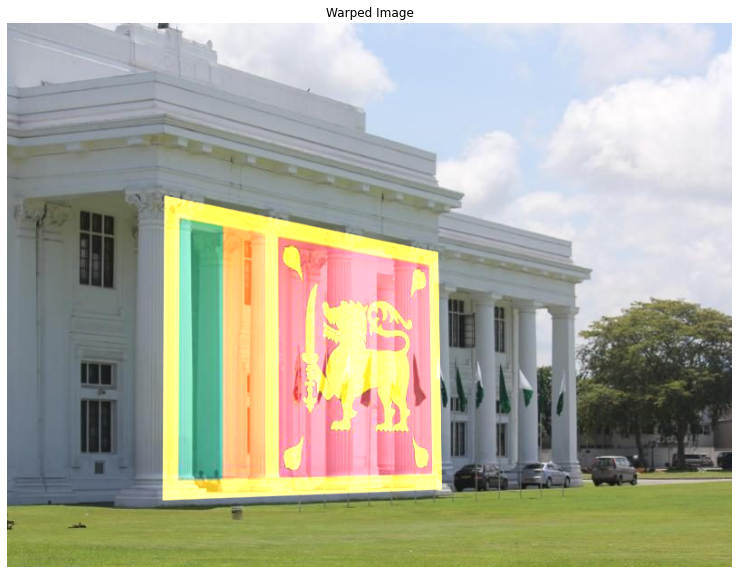

In [48]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

points = 4
counter = 0    
point_matrix_archiImage = np.empty((points,2), np.int)
point_matrix_Flag = np.empty((points,2))

# mouse callback function
def mousePoints(event,x,y,flags,array):
    global counter
    point_matrix = array[0]
    if event == cv.EVENT_LBUTTONDOWN: # Left button mouse click event opencv
        cv.circle(array[1],(x,y),5,(255,0,0),-1)        
        point_matrix[counter] = [x,y]
        counter += 1
          
archiImage = cv.imread(r'./Images/Town-Hall-3.jpg', cv.IMREAD_ANYCOLOR)
Flag = cv.imread(r'./Images/Flag_SriLanka.jfif', cv.IMREAD_ANYCOLOR)

assert archiImage is not None
assert Flag is not None
archiImage_copy = archiImage.copy()
Flag_copy = Flag.copy()

cv.namedWindow('Archi Image', cv.WINDOW_AUTOSIZE)
array1 = [point_matrix_archiImage, archiImage_copy]
cv.setMouseCallback('Archi Image',mousePoints, array1)

while True:
    cv.imshow("Archi Image", archiImage_copy)
    if counter == points:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break

point_matrix_Flag = np.array([[0,0],  [274, 0], [274, 182], [0, 182]])
def computeHomography(matrix1, matrix2):
    n = matrix1.shape[0]
    A = np.zeros((2*n, 9))
    for i in range(n):
        xs = point_matrix_Flag[i][0]
        ys = point_matrix_Flag[i][1]
        xd = point_matrix_archiImage[i][0]
        yd = point_matrix_archiImage[i][1]
        A[2*i] =  np.array([xs, ys, 1, 0, 0, 0, -xd*xs, -xd*ys, -xd])
        A[2*i+1] = np.array([0, 0, 0, xs, ys, 1, -yd*xs, -yd*ys, -yd])
    A = np.array(A)

    w, v = np.linalg.eig((A.T)@A)
    V = v[:, np.argmin(w)]
    V = np.reshape(V,(3,3))
    V = V/V[2][2]
    return V

V = computeHomography(point_matrix_Flag, point_matrix_archiImage)
Flag_warped_Image = cv.warpPerspective(Flag, V, (archiImage.shape[1], archiImage.shape[0]))
Final_Image = cv.addWeighted(archiImage, 1, Flag_warped_Image, 1, 0)
print(V)
Imageplot = cv.cvtColor(Final_Image, cv.COLOR_BGR2RGB)
fig, ax = plt.subplots(1,1, figsize = (20,10))
ax.imshow(Imageplot)
ax.set_title('Warped Image')
ax.axis('off')
plt.show()

C:\Users\K.Thanushan\AppData\Local\Temp\ipykernel_4940\648793114.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  point_matrix_archiImage = np.empty((points,2), np.int)


[[ 9.93393633e-01 -1.01857730e-02  3.02999999e+02]
 [ 2.39151149e-01  6.43114855e-01  2.70000000e+02]
 [ 5.15509892e-04 -6.94255491e-05  1.00000000e+00]]


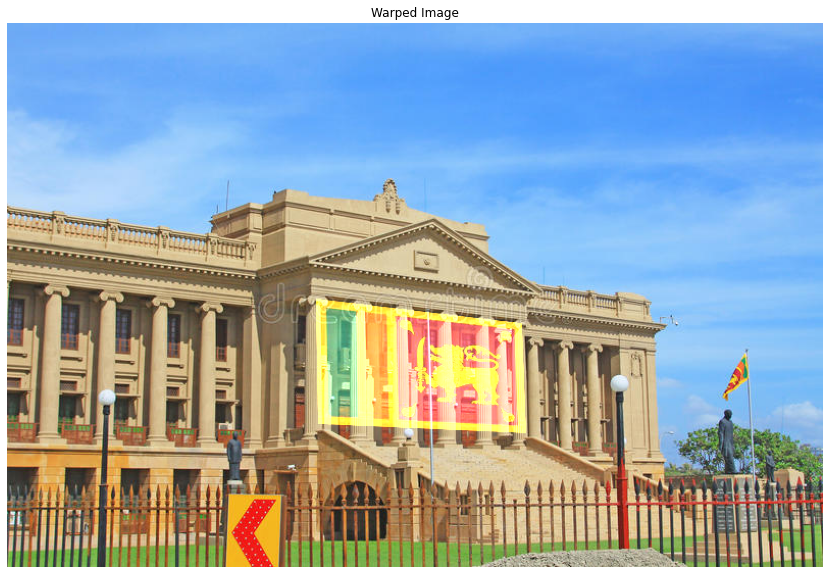

In [55]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

points = 4
counter = 0    
point_matrix_archiImage = np.empty((points,2), np.int)
point_matrix_Flag = np.empty((points,2))

# mouse callback function
def mousePoints(event,x,y,flags,array):
    global counter
    point_matrix = array[0]
    if event == cv.EVENT_LBUTTONDOWN: # Left button mouse click event opencv
        cv.circle(array[1],(x,y),5,(255,0,0),-1)        
        point_matrix[counter] = [x,y]
        counter += 1
          
archiImage = cv.imread(r'./Images/presidential-secretariat-office-sri-lanka-col.jpg', cv.IMREAD_ANYCOLOR)
Flag = cv.imread(r'./Images/Flag_SriLanka.jfif', cv.IMREAD_ANYCOLOR)

assert archiImage is not None
assert Flag is not None
archiImage_copy = archiImage.copy()
Flag_copy = Flag.copy()

cv.namedWindow('Archi Image', cv.WINDOW_AUTOSIZE)
array1 = [point_matrix_archiImage, archiImage_copy]
cv.setMouseCallback('Archi Image',mousePoints, array1)

while True:
    cv.imshow("Archi Image", archiImage_copy)
    if counter == points:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break

point_matrix_Flag = np.array([[0,0],  [274, 0], [274, 182], [0, 182]])
def computeHomography(matrix1, matrix2):
    n = matrix1.shape[0]
    A = np.zeros((2*n, 9))
    for i in range(n):
        xs = point_matrix_Flag[i][0]
        ys = point_matrix_Flag[i][1]
        xd = point_matrix_archiImage[i][0]
        yd = point_matrix_archiImage[i][1]
        A[2*i] =  np.array([xs, ys, 1, 0, 0, 0, -xd*xs, -xd*ys, -xd])
        A[2*i+1] = np.array([0, 0, 0, xs, ys, 1, -yd*xs, -yd*ys, -yd])
    A = np.array(A)

    w, v = np.linalg.eig((A.T)@A)
    V = v[:, np.argmin(w)]
    V = np.reshape(V,(3,3))
    V = V/V[2][2]
    return V

V = computeHomography(point_matrix_Flag, point_matrix_archiImage)
Flag_warped_Image = cv.warpPerspective(Flag, V, (archiImage.shape[1], archiImage.shape[0]))
Final_Image = cv.addWeighted(archiImage, 1, Flag_warped_Image, 1, 0)
print(V)
Imageplot = cv.cvtColor(Final_Image, cv.COLOR_BGR2RGB)
fig, ax = plt.subplots(1,1, figsize = (20,10))
ax.imshow(Imageplot)
ax.set_title('Warped Image')
ax.axis('off')
plt.show()

### Question 3:- Stitching Two Images by computing a hormography using RANSAC 

In [6]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

def computeHomography(Pairs):
    A = []
    for xs,ys,xd,yd in Pairs:
        A.append([xs, ys, 1, 0, 0, 0, -xd*xs, -xd*ys, -xd])
        A.append([0, 0, 0, xs, ys, 1, -yd*xs, -yd*ys, -yd])
    A = np.array(A)
    
    
    w, v = np.linalg.eig((A.T)@A)
    V = v[:, np.argmin(w)]
    V = np.reshape(V,(3,3))
    V = V/V[2][2]
    return V

def distance(point_pair, Homography):
    Source_point = np.array([[point_pair[0]], [point_pair[1]], [1]])
    Destination_point = np.array([[point_pair[2]], [point_pair[3]], [1]])
   
    Destination_point_approx = Homography@(Source_point) #calculating the destination point using homography
    Normalized_approx_Destination_Point = (Destination_point_approx/Destination_point_approx[2])
    return np.linalg.norm(Normalized_approx_Destination_Point - Destination_point) #Finding the difference 

def RANSAC_fit(X):
    t = 45
    N = np.inf
    BesthomographyMatrix = None
    Inliers = []
    sample_points =[] 
    p = 0.99 #probability 𝑝, at least one random sample is free from outliers 
    iterations = 0
    min_s = 4 #Minimum no of points required to find the homography matrix
    e = 0.5 #Outlier ratio 0.5 was taken for the worst case
    #N = 20000
    while N > iterations:
        random_indices= np.random.randint(len(X), size=min_s)
        random_points = np.array([X[random_index] for random_index in random_indices])
        
        #Calculation of the homography matrix using the random points obtained in each iteration
        testHomographyMatrix = computeHomography(random_points)
        
        Inliers_test = []
        #Checking for inliers and appending them into the inlier set.
        for point_pair in X:
            if distance(point_pair, testHomographyMatrix) < t:
                Inliers_test.append(point_pair)

        Inliers_test = np.array(Inliers_test)

        #Checking whether the number of current inliers is greater than the past inliers
        if (len(Inliers_test) > len(Inliers)):
            BesthomographyMatrix = testHomographyMatrix #Getting the Homography matrix and radius of the best fit circle
            Inliers = Inliers_test
            e = 1-(len(Inliers)/len(X))
            N = np.log(1-p)/np.log(1-(1-e)**min_s)  #calculation of samples
        iterations+=1
    return Inliers, BesthomographyMatrix

#Matching SIFT Features
def Match(Image1, Image2):
    sift = cv.SIFT_create()
    keypoints_1, descriptors_1 = sift.detectAndCompute(Image1, None)
    keypoints_2, descriptors_2 = sift.detectAndCompute(Image2, None)

    sift_image1 = cv.drawKeypoints(Image1, keypoints_1, Image1)
    sift_image5 = cv.drawKeypoints(Image2, keypoints_2, Image2)

    FLANN_INDEX_KDTREE = 1
    index_params = dict(algorithm = FLANN_INDEX_KDTREE, tree = 5)
    search_params = dict(checks = 50)
    flann = cv.FlannBasedMatcher(index_params, search_params)
    matches = flann.knnMatch(descriptors_1, descriptors_2, k = 2)
    good_matches = []
    points = []

    for i, (m, n) in enumerate(matches):
        if m.distance < 0.7*n.distance:
            good_matches.append(m)
            points.append([keypoints_1[m.queryIdx].pt[0], keypoints_1[m.queryIdx].pt[1], keypoints_2[m.trainIdx].pt[0], keypoints_2[m.trainIdx].pt[1]])
    return keypoints_1, keypoints_2, good_matches, points

def main(Image1, Image2):
    keypoints_1, keypoints_2, good_matches, points = Match(Image1, Image2)
    Inliers, HomographyMatrix = RANSAC_fit(points)
    HomographyMatrix = computeHomography(Inliers)
    return HomographyMatrix

In [2]:
import cv2 as cv
Image1 = cv.imread(r'./images/graf/img1.ppm', cv.IMREAD_COLOR)
assert Image1 is not None

Image5 = cv.imread(r'./images/graf/img5.ppm', cv.IMREAD_COLOR)
assert Image5 is not None

Image1_copy = Image1.copy()
Image5_copy = Image5.copy()

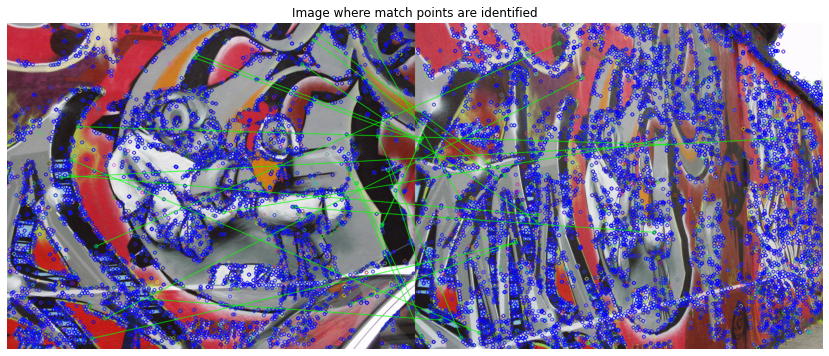

In [4]:
import matplotlib.pyplot as plt
sift = cv.SIFT_create()
keypoints_1, descriptors_1 = sift.detectAndCompute(Image1, None)
keypoints_2, descriptors_2 = sift.detectAndCompute(Image5, None)

sift_image1 = cv.drawKeypoints(Image1, keypoints_1, Image1)
sift_image5 = cv.drawKeypoints(Image5, keypoints_2, Image5)

FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, tree = 5)
search_params = dict(checks = 50)
flann = cv.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(descriptors_1, descriptors_2, k = 2)
good_matches = []
points = []

matchesMask = [[0,0] for i in range(len(matches))]
for i, (m, n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]

draw_params = dict(matchColor = (0,255,0), singlePointColor = (255,0,0), matchesMask = matchesMask, flags = cv.DrawMatchesFlags_DEFAULT)
matching_image = cv.drawMatchesKnn(Image1,keypoints_1,Image5,keypoints_2,matches,None,**draw_params)
Image_plot = cv.cvtColor(matching_image, cv.COLOR_BGR2RGB)
fig, ax = plt.subplots(1,1, figsize = (18, 6))
ax.imshow(Image_plot)
ax.set_title("Image where match points are identified")
ax.axis('off')
plt.show()

In [25]:
HomographyMatrix = np.identity(3)

for i in range(1,5):
    img1_name = str(i)+'.ppm'
    img1 = cv.imread(r'./images/graf/img'+img1_name)
    assert img1 is not None

    img2_name = str(i + 1)+'.ppm'
    img2 = cv.imread(r'./images/graf/img'+img2_name)
    assert img2 is not None
    Intermediate_homography = main(img1, img2)
    HomographyMatrix = np.matmul(Intermediate_homography, HomographyMatrix)

HomographyMatrix = HomographyMatrix/HomographyMatrix[2][2]
print(HomographyMatrix)

[[ 6.20198535e-01  5.36005363e-02  2.22463262e+02]
 [ 2.20662997e-01  1.14278117e+00 -2.20605717e+01]
 [ 4.90131680e-04 -6.69813362e-05  1.00000000e+00]]


Homography between image 1 and image 5:-

 6.20198535e-01     5.36005363e-02      2.22463262e+02
 
 2.20662997e-01     1.14278117e+00     -2.20605717e+01
 
 4.90131680e-04    -6.69813362e-05      1.00000000e+00

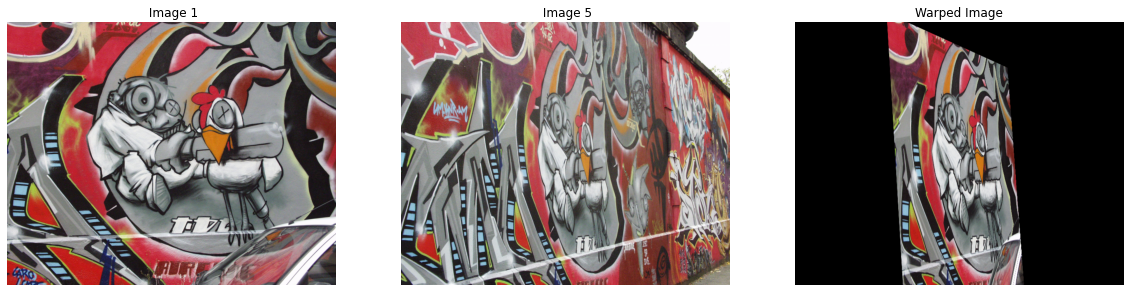

In [26]:
width = Image5.shape[1]# + Image1.shape[1]
height = Image5.shape[0]# + int(Image1.shape[0]/4)
Final_warped_Image = cv.warpPerspective(Image1_copy, HomographyMatrix, (width, height))
Final_warped_Image_copy = Final_warped_Image.copy()

Imageplot1 = cv.cvtColor(Image1_copy, cv.COLOR_BGR2RGB)
Imageplot2 = cv.cvtColor(Image5_copy, cv.COLOR_BGR2RGB)
Imageplot3 = cv.cvtColor(Final_warped_Image_copy, cv.COLOR_BGR2RGB)
fig, ax = plt.subplots(1,3, figsize = (20,10))
ax[0].imshow(Imageplot1)
ax[0].set_title(' Image 1')
ax[0].axis('off')
ax[1].imshow(Imageplot2)
ax[1].set_title(' Image 5')
ax[1].axis('off')
ax[2].imshow(Imageplot3)
ax[2].set_title('Warped Image')
ax[2].axis('off')
plt.show()


Text(0.5, 1.0, 'Background Image')

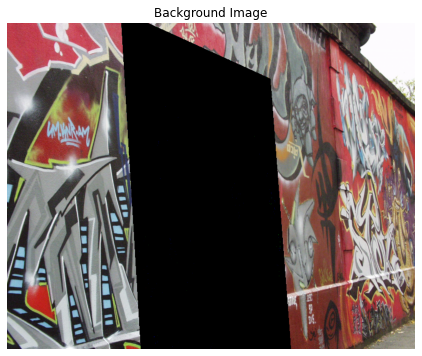

In [28]:
ret, Mask_image = cv.threshold(Final_warped_Image_copy, 15, 1, cv.THRESH_BINARY_INV)
background_image = np.multiply(Image5_copy, Mask_image)
Imageplot4= cv.cvtColor(background_image, cv.COLOR_BGR2RGB)
fig, ax = plt.subplots(1, 1, figsize = (18,6))
ax.imshow(Imageplot4)
ax.axis('off')
ax.set_title('Background Image')


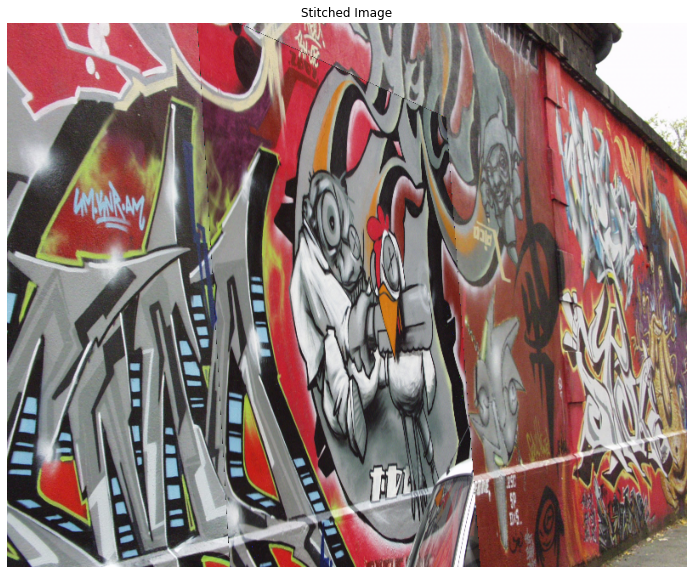

In [30]:
Final_Image = cv.addWeighted(background_image, 1, Final_warped_Image, 1, 0.0)
Imageplot = cv.cvtColor(Final_Image, cv.COLOR_BGR2RGB)
fig, ax = plt.subplots(1,1, figsize = (20,10))
ax.imshow(Imageplot)
ax.set_title('Stitched Image')
ax.axis('off')
plt.show()